In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '/home/dparks/Downloads/rmotc/DataSets/Seismic/CD files/3D_Seismic/filt_mig.sgy'

In [3]:
from obspy.io.segy.segy import _read_segy
stream = _read_segy(filename, headonly=True)

In [4]:

traces_with_indexes = []

for trace in stream.traces[:10000]:
    x = trace.header.x_coordinate_of_ensemble_position_of_this_trace - 1
    y = trace.header.y_coordinate_of_ensemble_position_of_this_trace - 1

    traces_with_indexes.append((x,y, trace.data))


In [5]:
x_max = max(traces_with_indexes, key = lambda x: x[0])[0]
y_max = max(traces_with_indexes, key = lambda x: x[1])[1]

print(x_max, y_max)

53 187


In [7]:
x_len = x_max + 1
y_len = y_max + 1
s_len = len(traces_with_indexes[0][2])
threeDSamples = np.zeros((x_len, y_len, s_len))

In [8]:
for xy_trace in traces_with_indexes:
    x = xy_trace[0]
    y = xy_trace[1]
    samples = xy_trace[2]
    threeDSamples[x, y] = samples

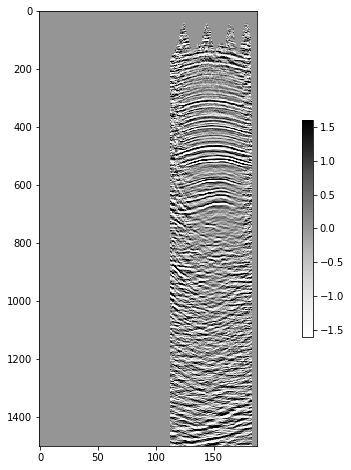

In [10]:
vm = np.percentile(threeDSamples, 99)

plt.figure(figsize=(16,8))
plt.imshow(threeDSamples[50].T, cmap="Greys", vmin=-vm, vmax=vm, aspect=0.25)
plt.colorbar(shrink=0.5)
plt.show()

In [11]:
from mayavi import mlab

ModuleNotFoundError: No module named 'mayavi'